# <center>Sepsis Prediction</center>

## Business Understanding

Sepsis is a life-threatening condition that arises when the body's response to infection causes systemic inflammation. This "Sepsis Prediction project aims to develop a predictive model for identification of sepsis in patients. Detection is critical for timely medical intervention, improving patient outcomes, and reducing mortality rates associated with sepsis.

## Business Objective
The objective of this project is to develop a machine learning model capable of accurately predicting the likelihood of sepsis based on relevant input features.This will also help generate valuable insights from the model's predictions, contributing to ongoing research and knowledge about sepsis patterns, risk factors, and effective treatments.

## Hypothesis 

**Null Hypothesis (H0)**: Plasma glucose levels do not affect the likelihood of developing sepsis. 

**Alternative Hypothesis (H1)**: Plasma glucose levels  affect the likelihood of developing sepsis.

## Questions
1. Is there a correlation between Plasma Glucose (PRG) and Blood Work Result-1 (PL)?
2. What is the age distribution of patients in the dataset?
3. How many patients in the dataset have valid insurance?
4. What is the distribution of Plasma Glucose levels among patients who developed sepsis compared to those who did not?
5. What is the percentage of patients who developed sepsis?

### Install required packages


In [1]:
#libraries for handling data
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)

#libraries for visulation
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.offline as offline
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
offline.init_notebook_mode(connected=True) # Configure Plotly to run 

#for hyothesis test
import statsmodels.api as sm

#Feature processing libraries
from phik import phik_matrix
from sklearn.preprocessing import StandardScaler,FunctionTransformer
from sklearn.preprocessing import LabelEncoder


##piplie and transformers
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils.class_weight import compute_class_weight


#algorithm libraries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

#model evaluation
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## saving model
import joblib

## Data Understanding

###  Column names and description

**ID**: number to represent patient ID

**PRG**: Plasma glucose

**PL**: Blood Work Result-1 (mu U/ml)

**PR**: Blood Pressure (mm Hg)

**SK**: Blood Work Result-2 (mm)

**TS**: Blood Work Result-3 (mu U/ml)

**M11**: Body mass index (weight in kg/(height in m)^2

**BD2**: Blood Work Result-4 (mu U/ml)

**Age**: patients age (years)

**Insurance**: If a patient holds a valid insurance card

**Sepsis**: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

### Data Loading

Here we will load the train and test datasets


In [2]:
#load data
path=r"C:\Users\User\Desktop\hub\Sepsis-Modelling-Using-FastAPI\Datasets\Paitients_Files_Train.csv"
path1=r"C:\Users\User\Desktop\hub\Sepsis-Modelling-Using-FastAPI\Datasets\Paitients_Files_Test.csv"

In [3]:
##read train and test
df_train=pd.read_csv(path)
df_test=pd.read_csv(path1)

In [4]:
#view train data
df_train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [5]:
#view test data
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


## Exploratory Data Analysis
Here we will analyze and investigate data sets and summarize their characteristics by using data visualization,


Before we begin the eda i will like to rename the columns of the train and test for more understanding

In [6]:
##renaming train
df_train.rename(columns={'PRG':'Plasma_glucose','PL': 'Blood_Work_R1','PR': 'Blood_Pressure',
                         'SK': 'Blood_Work_R2','TS': 'Blood_Work_R3','M11': 'BMI',
                         'BD2': 'Blood_Work_R4','Sepssis':'Sepsis'}, inplace=True)

In [7]:
## view changes
df_train.head()

,ID,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Age,Insurance,Sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [8]:
## rename test
df_test.rename(columns={'PRG':'Plasma_glucose','PL': 'Blood_Work_R1','PR': 'Blood_Pressure',
                         'SK': 'Blood_Work_R2','TS': 'Blood_Work_R3','M11': 'BMI',
                         'BD2': 'Blood_Work_R4'},inplace=True)

In [9]:
#view changes
df_test.head()

,ID,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


## Data Overview

#### Data info

Here we want to check the information the dataset contains

In [10]:
#check the info for train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              599 non-null    object 
 1   Plasma_glucose  599 non-null    int64  
 2   Blood_Work_R1   599 non-null    int64  
 3   Blood_Pressure  599 non-null    int64  
 4   Blood_Work_R2   599 non-null    int64  
 5   Blood_Work_R3   599 non-null    int64  
 6   BMI             599 non-null    float64
 7   Blood_Work_R4   599 non-null    float64
 8   Age             599 non-null    int64  
 9   Insurance       599 non-null    int64  
 10  Sepsis          599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [11]:
#check info for test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              169 non-null    object 
 1   Plasma_glucose  169 non-null    int64  
 2   Blood_Work_R1   169 non-null    int64  
 3   Blood_Pressure  169 non-null    int64  
 4   Blood_Work_R2   169 non-null    int64  
 5   Blood_Work_R3   169 non-null    int64  
 6   BMI             169 non-null    float64
 7   Blood_Work_R4   169 non-null    float64
 8   Age             169 non-null    int64  
 9   Insurance       169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


## Observation
- The train dataset has 11 features with 599 entries.
- The test dataset has 10 features with 169 entries.

## Checking for missing values

In [12]:
##check for missing values in train
df_train.isnull().sum()

ID                0
Plasma_glucose    0
Blood_Work_R1     0
Blood_Pressure    0
Blood_Work_R2     0
Blood_Work_R3     0
BMI               0
Blood_Work_R4     0
Age               0
Insurance         0
Sepsis            0
dtype: int64

In [13]:
##check for missing values in test
df_test.isnull().sum()

ID                0
Plasma_glucose    0
Blood_Work_R1     0
Blood_Pressure    0
Blood_Work_R2     0
Blood_Work_R3     0
BMI               0
Blood_Work_R4     0
Age               0
Insurance         0
dtype: int64

### Observation
- There are no missing values in the train and test

### Checking data shape

In [14]:
## check shapes for train and test
df_train.shape ,df_test.shape

((599, 11), (169, 10))

### Check for duplicates

In [15]:
#Check for duplicates
duplicate_rows_train = df_train.duplicated().sum()
duplicate_rows_test = df_test.duplicated().sum()
print('There are ',duplicate_rows_train,' duplicated rows for the training set')
print('There are ',duplicate_rows_test,' duplicated rows for the test set')

There are  0  duplicated rows for the training set
There are  0  duplicated rows for the test set


###  Descriptive Statistics

Descriptive statistics are used in Exploratory Data Analysis (EDA) to summarize and describe the main features of a dataset. They provide a concise summary of the main characteristics of the data, allowing analysts to understand its key properties.

In [16]:
##check the description of the train data
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Plasma_glucose,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
Blood_Work_R1,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
Blood_Pressure,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
Blood_Work_R2,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
Blood_Work_R3,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
BMI,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
Blood_Work_R4,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


In [17]:
##check the description of the test data
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Plasma_glucose,169.0,3.917160,3.402415,0.0,1.000,3.000,6.000,13.000
Blood_Work_R1,169.0,123.520710,29.259123,56.0,102.000,120.000,141.000,199.000
Blood_Pressure,169.0,70.426036,19.426805,0.0,62.000,74.000,80.000,114.000
Blood_Work_R2,169.0,20.443787,15.764962,0.0,0.000,23.000,32.000,49.000
Blood_Work_R3,169.0,81.000000,110.720852,0.0,0.000,0.000,135.000,540.000
BMI,169.0,32.249704,7.444886,0.0,27.600,32.400,36.600,57.300
Blood_Work_R4,169.0,0.438876,0.306935,0.1,0.223,0.343,0.587,1.698
Age,169.0,33.065089,11.548110,21.0,24.000,28.000,42.000,70.000
Insurance,169.0,0.727811,0.446410,0.0,0.000,1.000,1.000,1.000


### SUMMARY

- The minimum values for variables like Plasma Glucose, Blood Work Result-1, Blood Pressure, Blood Work Result-2, Blood Work Result-3, and Body Mass Index (BMI) are zero. Sometimes, a value of zero is used to represent missing data or undefined values in medical or health-related datasets.

- Features like Plasma_glucose,Blood_Pressure,Blood_Work_R2,BMI,Age, have a moderately variability meaning it is values are not far from the mean,blood_work_R1 and blood_work_R3 have a high variability and blood_work_R4 has low variablilty

- From the descrptive statistics there may be skewness in the data.When the mean is greater than the median there is a right skewed distribution and vice versa.

#  Univariate Analysis
Here is the section to explore, analyze, visualize each variable independently of the others.

## Checking for skewness in train data

In [18]:
#view skewness in train data
skewness=df_train.skew(numeric_only=True).sort_values(ascending=False)
skewness

Blood_Work_R3     2.401585
Blood_Work_R4     1.989472
Age               1.152353
Plasma_glucose    0.914008
Blood_Work_R2     0.164063
Blood_Work_R1     0.116180
BMI              -0.405255
Insurance        -0.804257
Blood_Pressure   -1.874662
dtype: float64

### Summary

It can be observed that:

**Positively-skewed**: Blood Work Result-3, Blood Work Result-4, Age, Plasma glucose, Blood Work Result-1, Blood Work Result-2

**Negatively-skewed**: Blood Pressure, Insurance, Body mass index

#### Visualization of skweness in train data

<Figure size 1200x800 with 0 Axes>

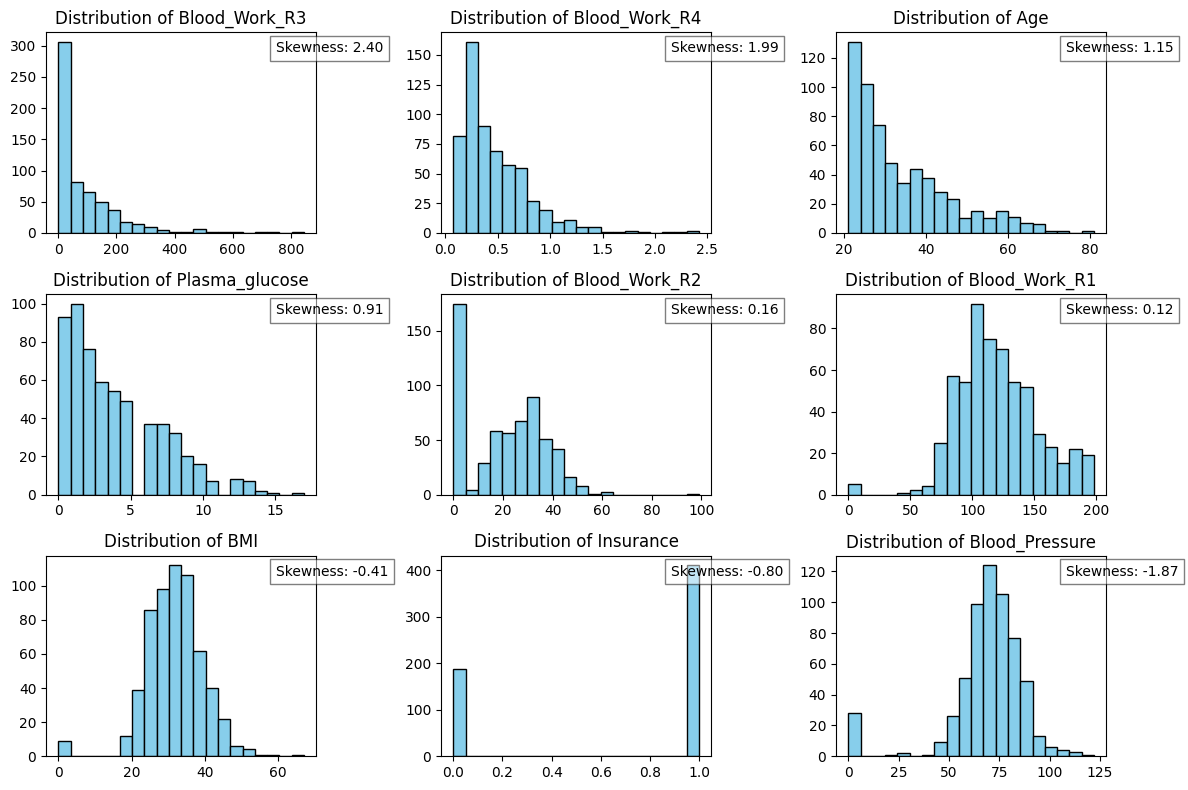

In [19]:
# Plot histograms 
plt.figure(figsize=(12, 8))
df_train[skewness.index].hist(grid=False, bins=20, color='skyblue', edgecolor='black', figsize=(12, 8))

# Annotate skewness values on each subplot
for ax, col, skew_val in zip(plt.gcf().get_axes(), skewness.index, skewness):
    ax.text(0.85, 0.9, f'Skewness: {skew_val:.2f}', transform=ax.transAxes, fontsize=10,
            bbox=dict(facecolor='white', alpha=0.5))
    ax.set_title(f'Distribution of {col}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


## Summary

- Right-skewed: Plasma glucose, Blood Work Result-2, Blood Work Result-3 , Blood Work Result-4, Age.
- Normally-distributed: Blood Work Result-1 , Blood Pressure, Body mass index.


## Checking skewness in test data


In [20]:
#check for skewness in test
skewness1=df_test.skew(numeric_only=True).sort_values(ascending=False)
skewness1

Blood_Work_R3     1.747436
Blood_Work_R4     1.559577
Age               1.049232
Plasma_glucose    0.866427
Blood_Work_R1     0.531711
Blood_Work_R2    -0.096263
BMI              -0.520007
Insurance        -1.032858
Blood_Pressure   -1.768116
dtype: float64

### Summary

It can be observed that:

**Positively-skewed**: Blood Work Result-3, Blood Work Result-4, Age, Plasma glucose, Blood Work Result-1

**Negatively-skewed**: Blood Pressure, Insurance, Body mass index,blood work result-2,

#### Visualization of skweness in test data

<Figure size 1200x800 with 0 Axes>

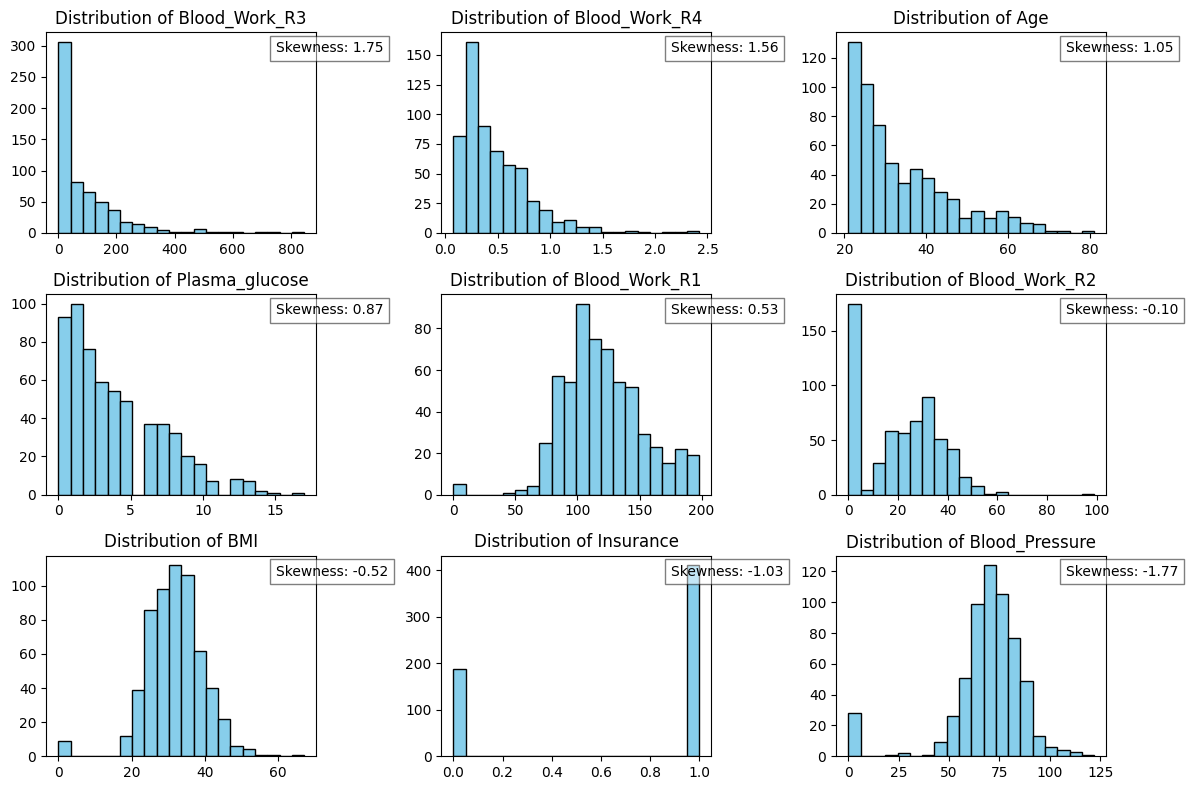

In [21]:
# Plot histograms 
plt.figure(figsize=(12, 8))
df_train[skewness1.index].hist(grid=False, bins=20, color='skyblue', edgecolor='black', figsize=(12, 8))

# Annotate skewness values on each subplot
for ax, col, skew_val in zip(plt.gcf().get_axes(), skewness1.index, skewness1):
    ax.text(0.85, 0.9, f'Skewness: {skew_val:.2f}', transform=ax.transAxes, fontsize=10,
            bbox=dict(facecolor='white', alpha=0.5))
    ax.set_title(f'Distribution of {col}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


## Summary

- Right-skewed: Plasma glucose, Blood Work Result-3 , Blood Work Result-4, Age.
- Normally-distributed: Blood Work Result-1 , Blood Pressure, Body mass index.


## Checking for outliers in train and Test data


<Axes: >

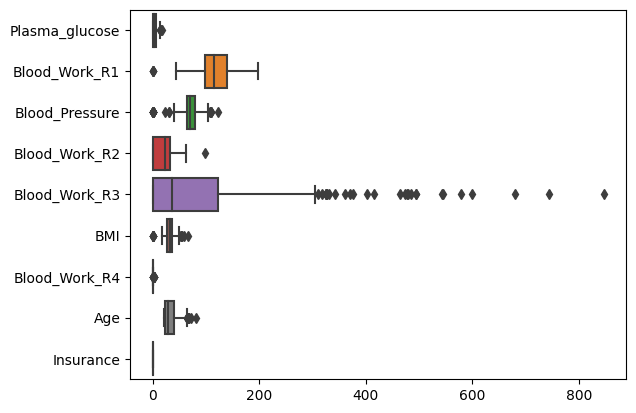

In [22]:
#check for outliers in train
sns.boxplot(data=df_train,orient='h')

<Axes: >

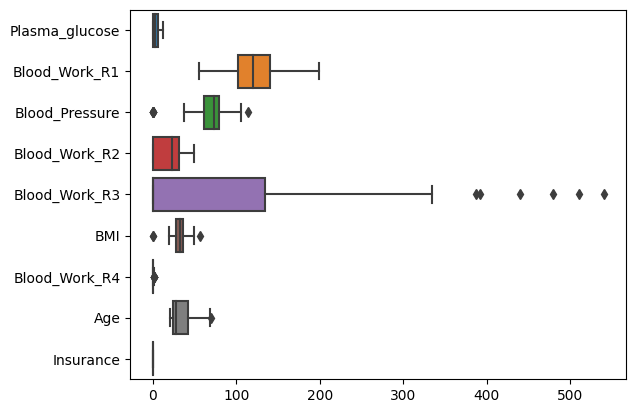

In [23]:
#view ouliers in test data
sns.boxplot(data=df_test,orient='h')

#### Observation
- Both datasets contain outliers

#### Visualization of the percentage unique values of our target

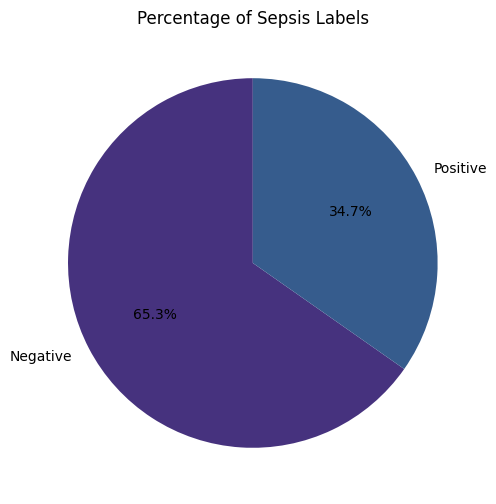

In [24]:
#plot a pie chart
sepsis_counts = df_train['Sepsis'].value_counts()
labels = sepsis_counts.index
sizes = sepsis_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=90)
plt.title('Percentage of Sepsis Labels')

plt.show()


### Summary 

- From the visual, Label feature, We can observe that there is an imbalance in our dataset; therefore we will have to deal with that later.
- 65.3% of the patients are negative.
- 34.7% of the patients are positive.

#### visualization of  count of  age feature 
Here we would like know the frequency of the age in our dataset.

In [25]:
#view number of unique values in age feature
df_train["Age"].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64],
      dtype=int64)

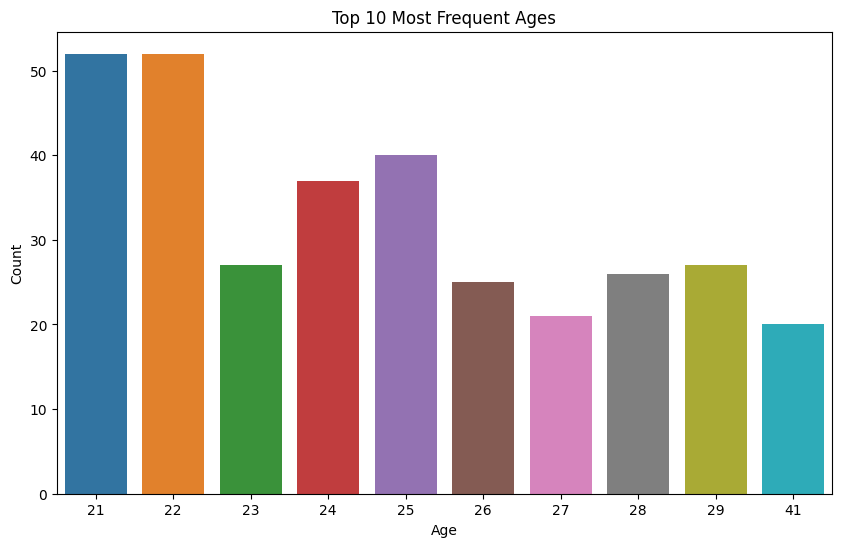

In [26]:
#plot the top 10  ages with the highest frequency
top_10_age_counts = df_train['Age'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_age_counts.index, y=top_10_age_counts.values)

plt.title('Top 10 Most Frequent Ages')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()


from the visual the age with the highest frequency are ages 21 and 22 

#  Bivariate Analysis

#### Relationship Between Blood Pressure and Body mass index with Respect To Sepsis

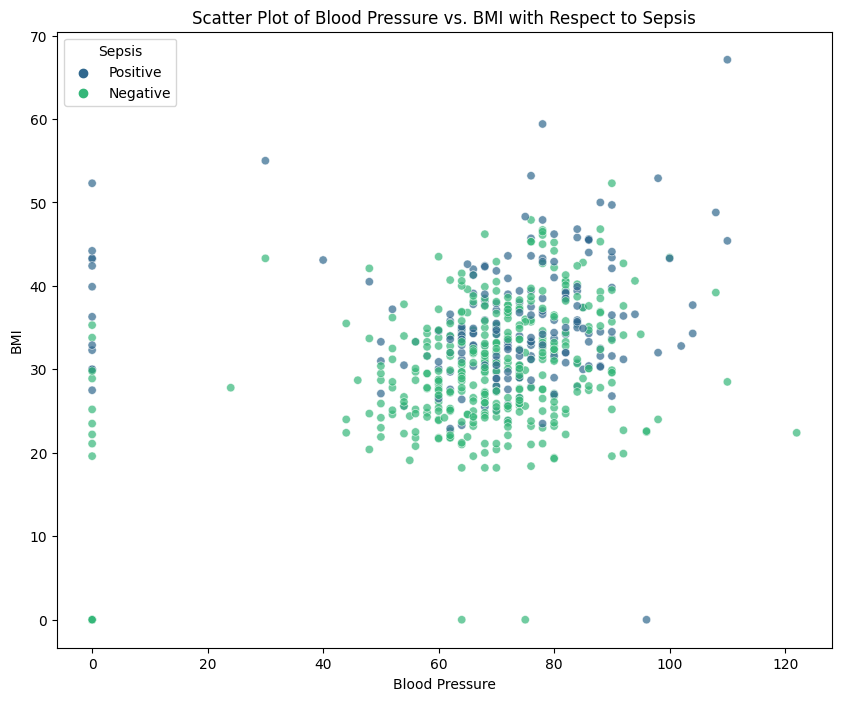

In [27]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Blood_Pressure', y='BMI', hue='Sepsis', data=df_train, palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Blood Pressure vs. BMI with Respect to Sepsis')
plt.xlabel('Blood Pressure')
plt.ylabel('BMI')
plt.show()

## Observation

There is no relationship between blood presssure and b,i with respect to sepsis

#### Relationship Between Plasma glucose and Body mass index with Respect To Sepsis

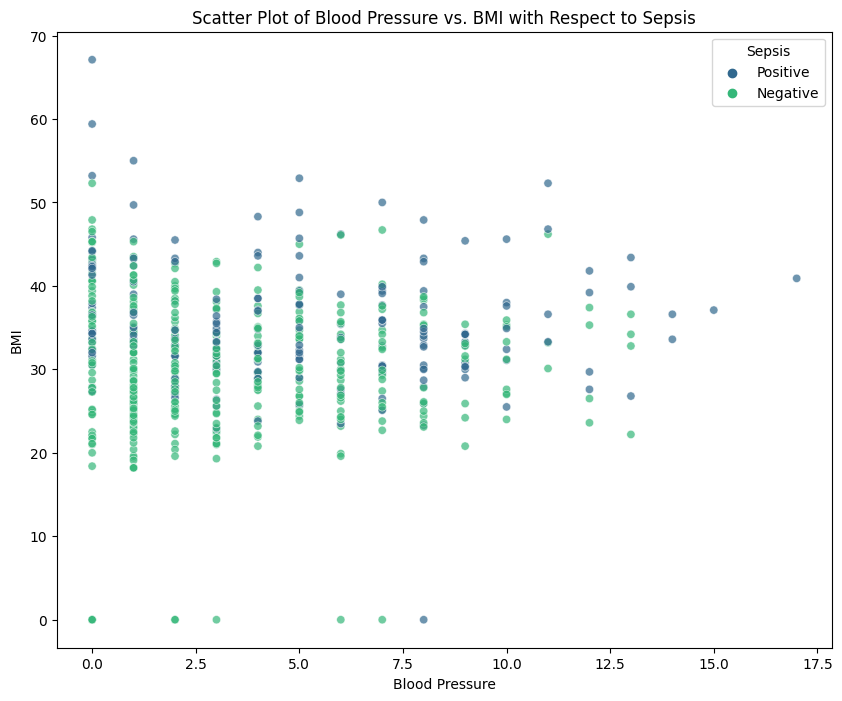

In [28]:
# Assuming df_train is your DataFrame
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Plasma_glucose', y='BMI', hue='Sepsis', data=df_train, palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Blood Pressure vs. BMI with Respect to Sepsis')
plt.xlabel('Blood Pressure')
plt.ylabel('BMI')
plt.show()

# Muiltivariate Analysis

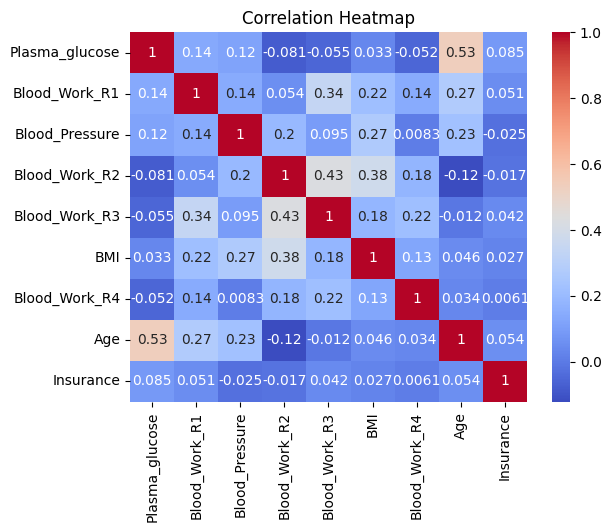

In [29]:
# Select numeric columns only
numeric_columns = df_train.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Observation
- The correlation between features are weak, except for the plasma glucose and age which is 0.53. 

## Hypotheis Testing

**Null Hypothesis (H0)**: Plasma glucose levels do not affect the likelihood of developing sepsis. 

**Alternative Hypothesis (H1)**: Plasma glucose levels  affect the likelihood of developing sepsis.

 Logistic regression is an appropriate choice when you have a binary categorical outcome variable (like "Sepsis" with values Positive/Negative) and one or more predictor variables, which can be either numeric or categorical.

 We will use a significant value of 0.05

In [30]:
#we create a copy of the dataset we will use for hypothesis testing and visualisation
df_train_c=df_train.copy()

In [31]:
# Convert 'Sepsis' to numeric (0 or 1)
df_train_c['Sepsis'] = df_train_c['Sepsis'].replace({'Negative': 0, 'Positive': 1})

# Add a constant term to the independent variable
X = sm.add_constant(df_train_c['Plasma_glucose'])
y = df_train_c['Sepsis']

# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display the summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.624600
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Sepsis   No. Observations:                  599
Model:                          Logit   Df Residuals:                      597
Method:                           MLE   Df Model:                            1
Date:                Tue, 21 Nov 2023   Pseudo R-squ.:                 0.03271
Time:                        12:13:27   Log-Likelihood:                -374.14
converged:                       True   LL-Null:                       -386.79
Covariance Type:            nonrobust   LLR p-value:                 4.890e-07
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.1443      0.139     -8.259      0.000      -1.416      -0.873
Plasma_glucose   

## Summary 

This logistic regression model suggests that the "Plasma_glucose" variable is statistically significant in predicting the likelihood of developing sepsis. In the logistic regression summary , the p-value associated with the "Plasma_glucose" variable is found in the "P>|z|" column. 

Specifically:Plasma_glucose: 0.000

This means that the p-value for the "Plasma_glucose" variable is less than 0.05 indicating that the coefficient for "Plasma_glucose" is statistically significant. In other words, there is evidence to reject the null hypothesis that the coefficient for "Plasma_glucose" is zero. The variable "Plasma_glucose" is considered to have a statistically significant impact on the likelihood of developing sepsis in this model.

## Answering Questions

##### 1. Is there a correlation between Plasma Glucose (PRG) and Blood Work Result-1 (PL)?

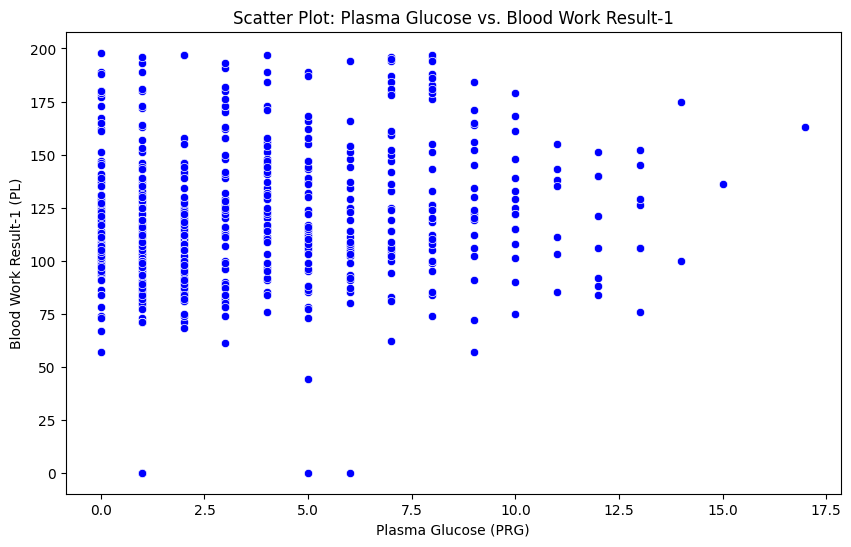

In [32]:
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(data=df_train_c, x='Plasma_glucose', y='Blood_Work_R1', color='blue')

# Set labels and title
plt.xlabel('Plasma Glucose (PRG)')
plt.ylabel('Blood Work Result-1 (PL)')
plt.title('Scatter Plot: Plasma Glucose vs. Blood Work Result-1')

# Display the plot
plt.show()


There is no correlation between Plasma Glucose (PRG) and Blood Work Result-1 (PL)?

#### 2.What is the age distribution of patients in the dataset?

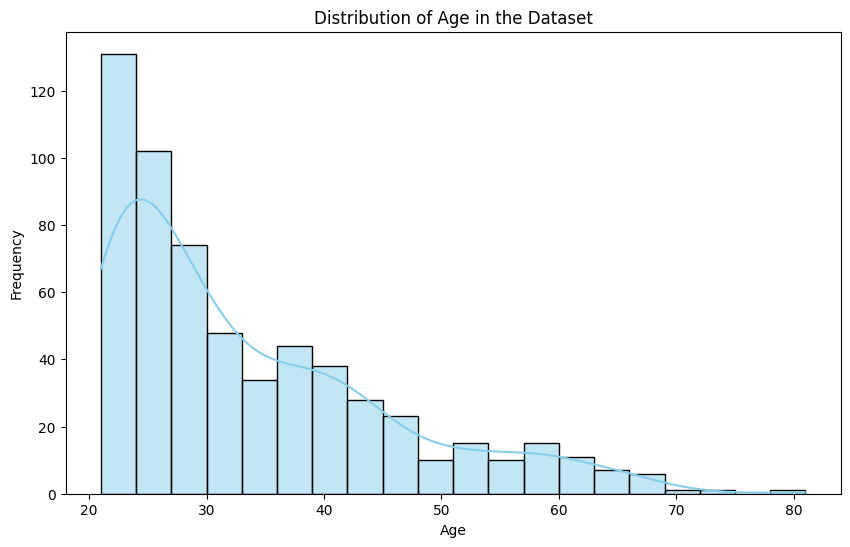

In [33]:
plt.figure(figsize=(10, 6))

# Histogram
sns.histplot(data=df_train_c, x='Age', bins=20, kde=True, color='skyblue')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age in the Dataset')

# Display the plot
plt.show()


## Observation

In the dataset, the age of 20 has the highest frequency, as there are 120 individuals or more who are 20 years old. This indicates that a substantial proportion of the patients fall within this specific age category. 


#### 3. How many patients in the dataset have valid insurance?

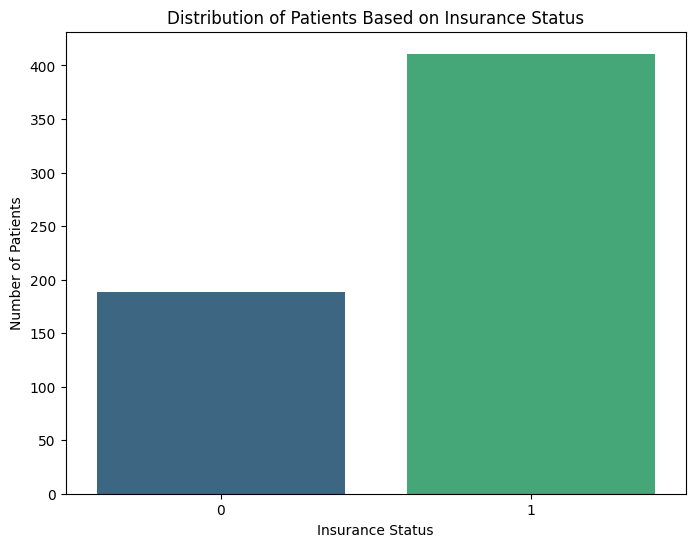

In [34]:
plt.figure(figsize=(8, 6))

# Bar plot
sns.countplot(data=df_train_c, x='Insurance', palette='viridis')

# Set labels and title
plt.xlabel('Insurance Status')
plt.ylabel('Number of Patients')
plt.title('Distribution of Patients Based on Insurance Status')

# Display the plot
plt.show()


##### Observation 
A high number of patients(400) have a valid insurance

#### 4.What is the distribution of Plasma Glucose levels among patients who developed sepsis compared to those who did not?

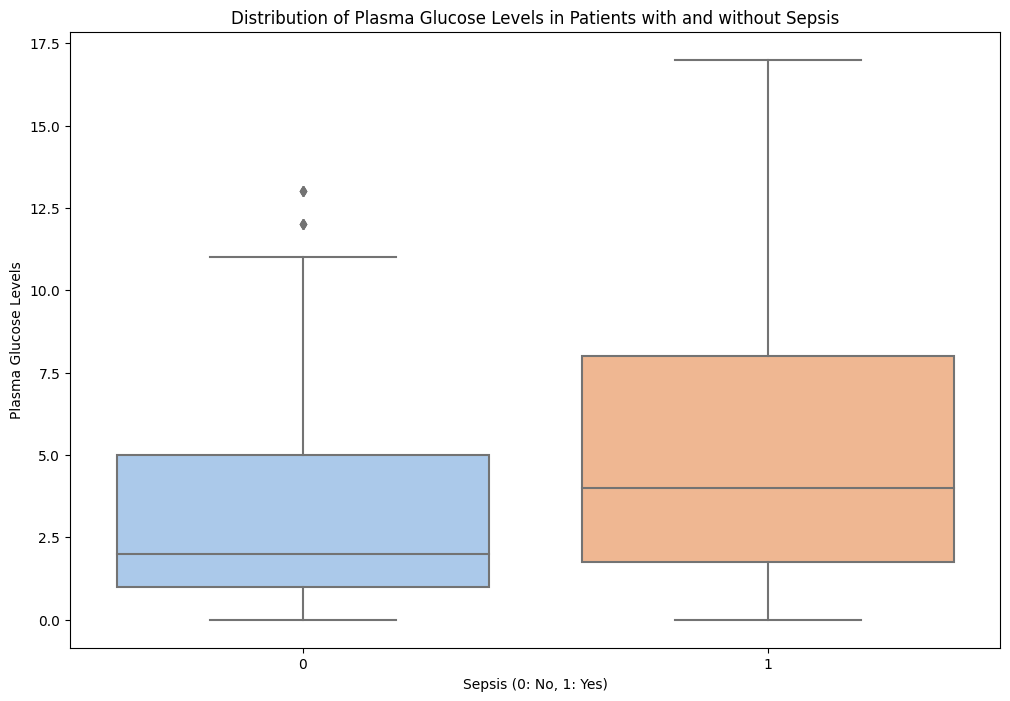

In [35]:
plt.figure(figsize=(12, 8))

# Box plot
sns.boxplot(data=df_train_c, x='Sepsis', y='Plasma_glucose', palette='pastel')

# Set labels and title
plt.xlabel('Sepsis (0: No, 1: Yes)')
plt.ylabel('Plasma Glucose Levels')
plt.title('Distribution of Plasma Glucose Levels in Patients with and without Sepsis')

# Display the plot
plt.show()


There is a higher number of patients that have plasma glucose and are septic

#### 5. What is the percentage of patients who developed sepsis?

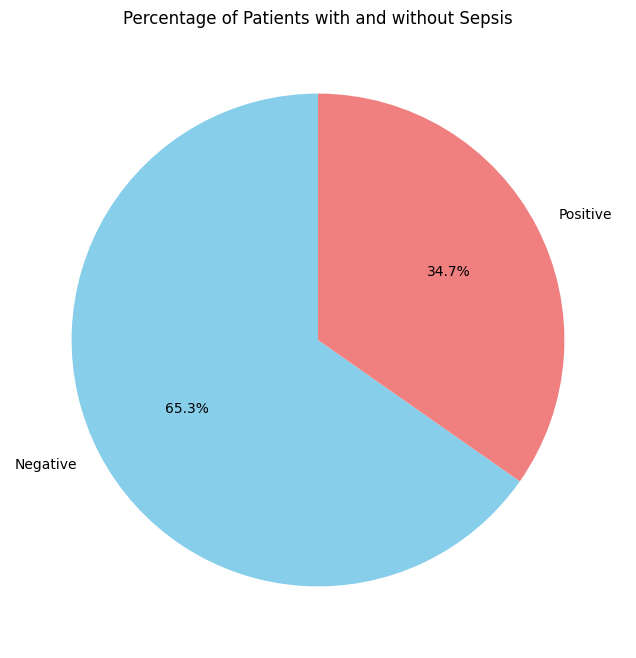

In [36]:
sepsis_counts = df_train['Sepsis'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sepsis_counts, labels=sepsis_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'],startangle=90)
plt.title('Percentage of Patients with and without Sepsis')
plt.show()


### Observation
34.7% of individuals developed sepsis

## Feature Selection
The best features will be selected for our alogorithm.We will use phi-k correlation which is an extension of phi correlation. It returns a matrix of correlation values between the categorical variables. The higher the value, the stronger the association between the variables.


In [37]:
### df_train will be used for modelling

In [38]:
# Calculate Phi-K correlation
phi_k_corr_matrix = df_train.phik_matrix()
phi_k_corr = phi_k_corr_matrix["Sepsis"]


interval columns not set, guessing: ['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2', 'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Age', 'Insurance']


In [39]:
#sort the values
print("Phi-K Correlation:")
phi_sort=phi_k_corr.sort_values()
phi_sort

Phi-K Correlation:


Insurance         0.066436
Blood_Pressure    0.205504
Blood_Work_R4     0.231272
Blood_Work_R3     0.258157
Plasma_glucose    0.281540
Blood_Work_R2     0.282151
BMI               0.327176
Age               0.388561
Blood_Work_R1     0.467470
ID                1.000000
Sepsis            1.000000
Name: Sepsis, dtype: float64

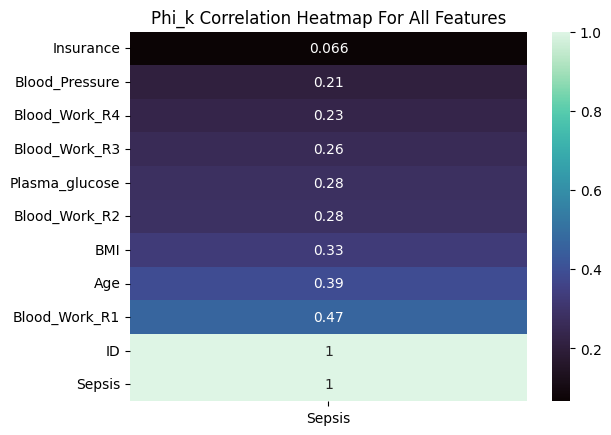

In [40]:
#Create a  phi-k correlation heatmap
sns.heatmap(phi_sort.to_frame(), annot=True, cmap='mako')
plt.title("Phi_k Correlation Heatmap For All Features")
plt.show()

Our correlation matrix has enabled us select the best features.The darker the color the less correlated the feature is to sepsis.So with this,i will drop columns
 * Insurance 
 * Id --based on the uniques

In [41]:
##we drop columns in our train and test
df_train=df_train.drop(["Insurance","ID"],axis=1)
df_test=df_test.drop(["Insurance","ID"],axis=1)

In [42]:
##confirm changes
df_train.head()

,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Age,Sepsis
0,6,148,72,35,0,33.6,0.627,50,Positive
1,1,85,66,29,0,26.6,0.351,31,Negative
2,8,183,64,0,0,23.3,0.672,32,Positive
3,1,89,66,23,94,28.1,0.167,21,Negative
4,0,137,40,35,168,43.1,2.288,33,Positive


## Modelling

### Data Splitting

#### Splitting our main data into training and evaluation

but before that,we will put our labels and features in X and y

In [43]:
## create features and label
X= df_train.drop("Sepsis", axis=1)
y= df_train.Sepsis

In [44]:
##view our featues
X.head()

,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [45]:
##view our label
y.head()

0    Positive
1    Negative
2    Positive
3    Negative
4    Positive
Name: Sepsis, dtype: object

In [46]:
#we unpack the data and split it into training and test sets

# Split the data into training and testing sets, with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (479, 8)
X_test shape: (120, 8)
y_train shape: (479,)
y_test shape: (120,)


## Convert our label to numeric 

In [47]:
# Create a LabelEncoder instance
LE = LabelEncoder()

In [48]:
# Convert the categorical label to numeric
num_y_train = LE.fit_transform(y_train)##fit and transform train data
num_y_test= LE.transform(y_test)##transform test data

## Creating a Column transformer 

In [49]:
##get input that will be in pipeline
num_input=X_train.columns
num_input

Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Age'],
      dtype='object')

In [50]:
##create a column transformer that will be used in the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), num_input),
        ('log_transform', FunctionTransformer(np.log1p), num_input)
    ]
)

## Balancing dataset

In [51]:
#view dataset
df_train.Sepsis.value_counts()

Sepsis
Negative    391
Positive    208
Name: count, dtype: int64

You can see an imbalance in our dataset where the negative class outways the positive so we will apply a balancing technique called class weight to balance the dataset

In [52]:
## intialize class weight
class_weights = compute_class_weight('balanced', classes=[0, 1], y=num_y_train)

In [53]:
# Assign our weight to our class
weight= dict(zip([0, 1], class_weights))
print(weight)

{0: 0.7651757188498403, 1: 1.4427710843373494}


Since this is a binary classification problem,we will use several machine learning models to find which one will give the best accuracy for our data. Here are the models:
- Logistic regression
- Decision tree
- Gradient boosting but we will use xgb boost
- Random Forest
- Support Vector Machine

## Logistic Regression

In [54]:
# Create a class-weighted Logistic Regression pipeline
log_R = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(random_state=100, class_weight=weight))
])

In [55]:
#fit the model
log_R.fit(X_train, num_y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Age'],
      dtype='object')),
                                                 ('log_transform',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Age'],
      dtype='object'))])),
                ('model',
                 LogisticRegression(class_weight={0: 0.7651757188498403,
                                                  1: 1.4427710843373494},
                                    random_state=100))])

In [56]:
#predict on test data
result_1= log_R.predict(X_test)

In [57]:
#model evaluation
print(classification_report(num_y_test, result_1))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78        78
           1       0.59      0.76      0.67        42

    accuracy                           0.73       120
   macro avg       0.72      0.74      0.72       120
weighted avg       0.76      0.73      0.74       120



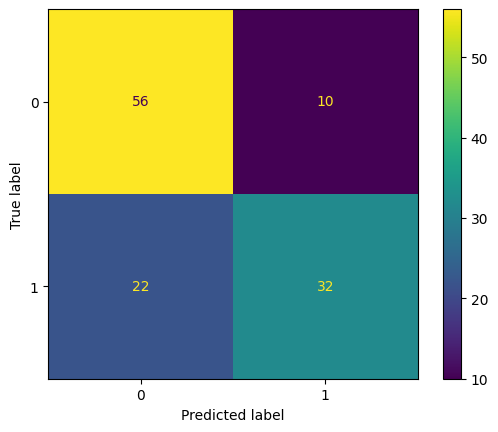

In [58]:
#generate a confusion matrix
ConfusionMatrixDisplay.from_predictions(result_1, num_y_test)

## Decision Tree

In [59]:
#create decision tree pipeline
DTC=Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=100, class_weight=weight))
])

In [60]:
#fit the model
DTC.fit(X_train,num_y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Age'],
      dtype='object')),
                                                 ('log_transform',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Age'],
      dtype='object'))])),
                ('model',
                 DecisionTreeClassifier(class_weight={0: 0.7651757188498403,
                                                      1: 1.4427710843373494},
                                        random_state=100))])

In [61]:
## predict on test
result_2=DTC.predict(X_test)

In [62]:
#model evaluation
print(classification_report(num_y_test, result_2))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77        78
           1       0.56      0.45      0.50        42

    accuracy                           0.68       120
   macro avg       0.65      0.63      0.63       120
weighted avg       0.67      0.68      0.67       120



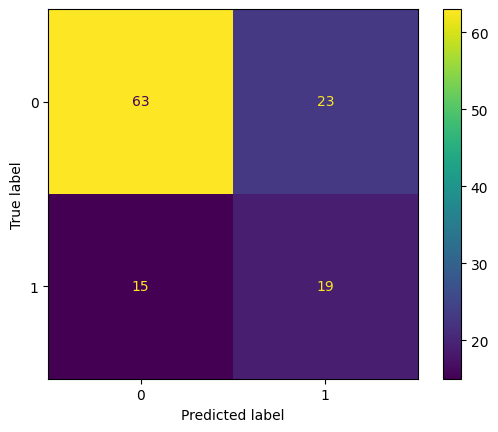

In [63]:
#generate a confusion matrix
ConfusionMatrixDisplay.from_predictions(result_2, num_y_test)

## Random Forest

In [64]:
## create a randome forest piepline
RF=Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=100, class_weight=weight))
])
    


In [65]:
## fit the data
RF.fit(X_train,num_y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Age'],
      dtype='object')),
                                                 ('log_transform',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Age'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(class_weight={0: 0.7651757188498403,
                                                      1: 1.4427710843373494},
                                        random_state=100))])

In [66]:
## predict on test set
result_3=RF.predict(X_test)

In [67]:
## evaluation
print(classification_report(num_y_test,result_3))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        78
           1       0.69      0.57      0.62        42

    accuracy                           0.76       120
   macro avg       0.74      0.72      0.72       120
weighted avg       0.75      0.76      0.75       120



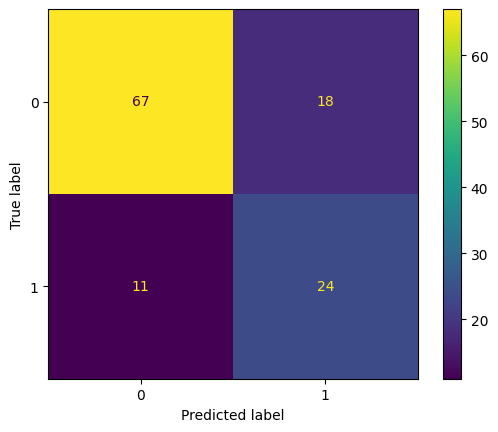

In [68]:
#generate a confusion matrix
ConfusionMatrixDisplay.from_predictions(result_3, num_y_test)

## Support Vector Machine

In [69]:
## create a pipeline 
SVM=Pipeline([
    ('preprocessor', preprocessor),
    ('model', SVC(random_state=100, class_weight=weight))
])
    

In [70]:
##fit the model
SVM.fit(X_train,num_y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Age'],
      dtype='object')),
                                                 ('log_transform',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Age'],
      dtype='object'))])),
                ('model',
                 SVC(class_weight={0: 0.7651757188498403,
                                   1: 1.4427710843373494},
                     random_state=100))])

In [71]:
##predict on test
result_4=SVM.predict(X_test)

In [72]:
## evaluation
print(classification_report(num_y_test,result_4))

              precision    recall  f1-score   support

           0       0.80      0.68      0.74        78
           1       0.54      0.69      0.60        42

    accuracy                           0.68       120
   macro avg       0.67      0.68      0.67       120
weighted avg       0.71      0.68      0.69       120



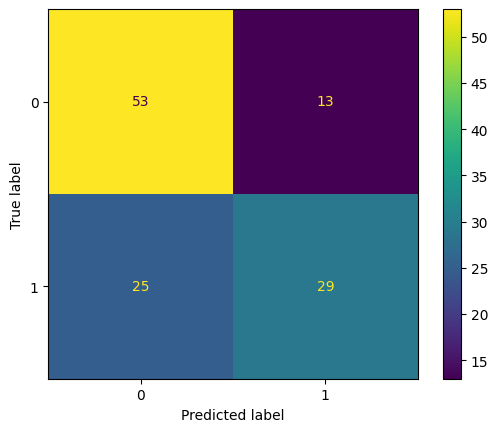

In [73]:
#generate a confusion matrix
ConfusionMatrixDisplay.from_predictions(result_4, num_y_test)

## XG Boost

Scale_pos_weight is the parameter you set to the ratio of the number of negative examples to the number of positive examples and this is used for xgboost

In [74]:
#we divide majority vs minority class
pos_weight = (sum(df_train["Sepsis"]== "Negative"))/(sum(df_train["Sepsis"]== "Positive"))

In [75]:
## create a pipeline
XG=Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(random_state=100, scale_pos_weight=pos_weight))
])

In [76]:
##fit the data
XG.fit(X_train,num_y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Age'],
      dtype='object')),
                                                 ('log_transform',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Wo...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=100, ...))])

In [77]:
##predict on test
result_5=XG.predict(X_test)

In [78]:
## evaluation
print(classification_report(num_y_test,result_5))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77        78
           1       0.58      0.60      0.59        42

    accuracy                           0.71       120
   macro avg       0.68      0.68      0.68       120
weighted avg       0.71      0.71      0.71       120



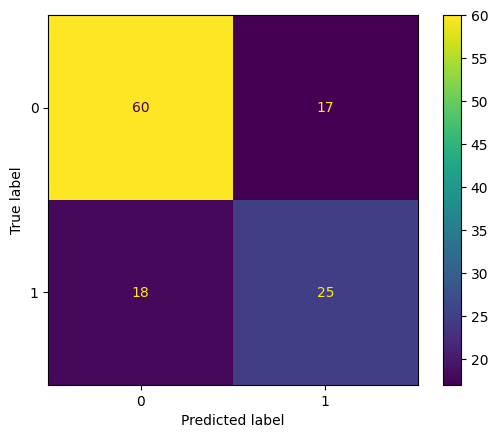

In [79]:
#generate a confusion matrix
ConfusionMatrixDisplay.from_predictions(result_5, num_y_test)

## Model Comparison
Here we will compare the model and choose the one with the best metric that suit our data

In [80]:
# Define your pipelines and create a dictionary
pipelines = {
    'Logistic Regression': result_1,
    'Decision Tree': result_2,
    'Random Forest': result_3,
    'Support Vector Machine': result_4,
    'XGBoost': result_5
}

 #Create lists to store data
classifiers = []
precisions = []
accuracies = []
recalls = []
f1_scores = []


In [81]:
# Populate the lists with data
for key, value in pipelines.items():
    report = classification_report(num_y_test, value, output_dict=True)
  
    
    classifiers.append(key)
    precisions.append(report["weighted avg"]["precision"])
    accuracies.append(report["accuracy"])
    recalls.append(report["weighted avg"]["recall"])
    f1_scores.append(report["weighted avg"]["f1-score"])
   

In [82]:
# Create a DataFrame
data = {
    "Classifier": classifiers,
    "Precision": precisions,
    "Accuracy": accuracies,
    "Recall": recalls,
    "F1-Score": f1_scores,
    
}

df = pd.DataFrame(data)

In [83]:
#Sort the DataFrame based on desired metrics
sorted_df = df.sort_values(by=["Precision","Accuracy","F1-Score","Recall"], ascending=False)
sorted_df = sorted_df.reset_index(drop=True)

sorted_df

,Classifier,Precision,Accuracy,Recall,F1-Score
0,Logistic Regression,0.758923,0.733333,0.733333,0.738889
1,Random Forest,0.752353,0.758333,0.758333,0.752538
2,XGBoost,0.709982,0.708333,0.708333,0.709108
3,Support Vector Machine,0.709933,0.683333,0.683333,0.689931
4,Decision Tree,0.671751,0.683333,0.683333,0.674390


After comparing,the logistic regression with class weights came out as the best model we will therefore proceed to tune some paramters to increase it's performance

## Hyperparamter Tuning

Here, we will find the best values for the hyperparameters of the machine learning model to improve its performance.Tuning these hyperparameters can lead to better model performance and generalization to new, unseen data.

In [84]:
# Define the parameter grid
param_grid = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'model__max_iter': [100, 500, 1000,4000],  
    'model__solver': ['liblinear', 'saga'],
    'model__penalty': ['l1', 'l2']
}


In [85]:
# Create GridSearchCV
grid_search = GridSearchCV(log_R, param_grid, cv=5, scoring='accuracy', n_jobs=-1)


In [86]:
#Perform the grid search:
grid_search.fit(X_train, num_y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Age'],
      dtype='object')),
                                                                        ('log_transform',
                                                                         FunctionTransformer(func=<ufunc 'log1p'>),
                                                                         Index(['Plasma_glucose', 'Blood_Work_R1...
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Age'],
      dtype='object'))])),
                                       ('model',
                                        LogisticRegression(class_weight={0: 0.7651757188498403,
                                                                         1: 1.4427710843373494},
                                                           random_state=100))]),
             n_jobs=-1,
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'model__max_iter': [100, 500, 1000, 4000],
                         'model__penalty': ['l1', 'l2'],
                         'model__solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [87]:
#Get the best parameter results and best_score
best_hyperparameters = grid_search.best_params_
best_score = grid_search.best_score_

print(f"best hyperparameters are:{best_hyperparameters}")
print(f"best score is {best_score}")

best hyperparameters are:{'model__C': 0.1, 'model__max_iter': 500, 'model__penalty': 'l2', 'model__solver': 'saga'}
best score is 0.7662938596491229


In [88]:
#### We get the best model
best_model = grid_search.best_estimator_

In [89]:
#view best model
best_model


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Age'],
      dtype='object')),
                                                 ('log_transform',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Age'],
      dtype='object'))])),
                ('model',
                 LogisticRegression(C=0.1,
                                    class_weight={0: 0.7651757188498403,
                                                  1: 1.4427710843373494},
                                    max_iter=500, random_state=100,
                                    solver='saga'))])

In [90]:
## Save the best model
joblib.dump(best_model, 'best_model.joblib')


['best_model.joblib']